<a href="https://colab.research.google.com/github/marreapato/Deep_Learning_Course/blob/main/all_labels_VLModel_Lucas_Rabelo_modelo_align.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador zero-shot utilizando o prompt da categoria.


In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.7/311.7 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.8 MB/s eta 0:00:00


## Modelo CLIP

In [3]:



import requests
from PIL import Image
import torch
from transformers import AlignProcessor, AlignModel

processor = AlignProcessor.from_pretrained('kakaobrain/align-base')
model = AlignModel.from_pretrained('kakaobrain/align-base')

In [4]:

model.text_model.embeddings

AlignTextEmbeddings(
  (word_embeddings): Embedding(30522, 768, padding_idx=0)
  (position_embeddings): Embedding(512, 768)
  (token_type_embeddings): Embedding(2, 768)
  (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

#Connect with Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [6]:
%cd /content/gdrive/MyDrive/Fundamentals_Deep_Learning

!ls




/content/gdrive/.shortcut-targets-by-id/1RQft65Bgd2d6TCEfL0c3FLA4gzbYIqmV/Fundamentals_Deep_Learning
 001_tensorflow.ipynb		     BANKEX.csv
 00_jupyterlab.ipynb		    'Cópia de 01_mnist.ipynb'
 01_mnist.ipynb			     data
 02_asl.ipynb			     GRU_B20
 03_asl_cnn.ipynb		     images
 04a_asl_augmentation.ipynb	     LSTM_B20
 04b_asl_predictions.ipynb	     mit_indoor_scene_dataset
 05a_doggy_door.ipynb		    'NN FeedForward - CIFAR - 10.ipynb'
 05b_presidential_doggy_door.ipynb   original
 06_headline_generator.ipynb	     outdir
 activities.csv			     RNN_multi.ipynb
 asl_model


In [7]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

data_dir = "/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/"
data_dir = pathlib.Path(data_dir)


train_dataset = list(data_dir.glob('train/*'))
test_dataset = list(data_dir.glob('test/*'))

In [8]:
train_dataset

[PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/ship'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/equine'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/deer'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/bird'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/plane'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/cat'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/car'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/dog'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/truck'),
 PosixPath('/content/gdrive/MyDrive/Fundamentals_Deep_Learning/original/train/frog')]

In [9]:
from pathlib import Path
# List to store (label, image, caption) tuples
labeled_images = []

# Loop through each folder and open each image
for folder_path in train_dataset:
    folder_path = Path(folder_path)

    # Extract label from folder name
    label = folder_path.stem

    # List all files in the folder
    image_files = folder_path.glob('*.*')

    # Loop through each image file
    for image_file in image_files:
        # Open the image
        image = Image.open(image_file)

        # Create a standard caption with the label at the end
        caption = f"Standard Caption Here - Label: {label}"

        # Append the (label, image, caption) tuple to the list
        labeled_images.append((label, image, caption))

In [10]:
# Extract images from the labeled_images tuple using a list comprehension
images_vector = [item[1] for item in labeled_images]

In [11]:
images_vector

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.Jpeg

In [12]:
# Extract images from the labeled_images tuple using a list comprehension
captions_vector = [item[2] for item in labeled_images]

In [13]:
images_vector[0:3]

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224>]

In [14]:
import numpy as np
vetor_caption=np.array(captions_vector)
vetor_caption=np.unique(vetor_caption).tolist()

In [15]:
len(images_vector)

21134

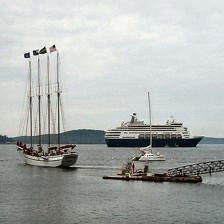

In [16]:
images_vector[9]

In [17]:
vetor_caption

['Standard Caption Here - Label: bird',
 'Standard Caption Here - Label: car',
 'Standard Caption Here - Label: cat',
 'Standard Caption Here - Label: deer',
 'Standard Caption Here - Label: dog',
 'Standard Caption Here - Label: equine',
 'Standard Caption Here - Label: frog',
 'Standard Caption Here - Label: plane',
 'Standard Caption Here - Label: ship',
 'Standard Caption Here - Label: truck']

In [18]:
inputs = processor(
    text=vetor_caption,
    images=images_vector[9],
    return_tensors="pt",
    padding=True
    )

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2632: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


O modelo prevê 95% de probabilidade do texto 'Standard Caption Here - Label: ship' pertencer imagem do navio

In [20]:
with torch.no_grad():
    outputs = model(**inputs)

# this is the image-text similarity score
logits_per_image = outputs.logits_per_image
print(logits_per_image)
# we can take the softmax to get the label probabilities
probs = logits_per_image.softmax(dim=1)
print(probs)

tensor([[ 5.4707,  4.5269,  5.2046,  4.8298,  3.7157,  4.5885,  3.4894,  6.1529,
         10.1434,  2.8533]])
tensor([[8.8937e-03, 3.4606e-03, 6.8156e-03, 4.6851e-03, 1.5378e-03, 3.6807e-03,
         1.2263e-03, 1.7593e-02, 9.5146e-01, 6.4914e-04]])


In [21]:
outputs

AlignOutput(loss=None, logits_per_image=tensor([[ 5.4707,  4.5269,  5.2046,  4.8298,  3.7157,  4.5885,  3.4894,  6.1529,
         10.1434,  2.8533]]), logits_per_text=tensor([[ 5.4707],
        [ 4.5269],
        [ 5.2046],
        [ 4.8298],
        [ 3.7157],
        [ 4.5885],
        [ 3.4894],
        [ 6.1529],
        [10.1434],
        [ 2.8533]]), text_embeds=tensor([[ 0.0025, -0.0041,  0.0134,  ..., -0.0107,  0.0170, -0.0048],
        [-0.0362,  0.0154,  0.0033,  ..., -0.0177,  0.0203,  0.0052],
        [-0.0064,  0.0008, -0.0020,  ..., -0.0262, -0.0010,  0.0101],
        ...,
        [-0.0187, -0.0010,  0.0049,  ..., -0.0015,  0.0198, -0.0012],
        [-0.0214, -0.0045,  0.0006,  ..., -0.0136,  0.0004,  0.0195],
        [-0.0330,  0.0015,  0.0247,  ..., -0.0078,  0.0122,  0.0089]]), image_embeds=tensor([[ 3.3605e-03, -1.5217e-02,  5.1506e-02,  1.9661e-02,  9.9979e-03,
          6.8745e-02,  6.1175e-02, -9.6279e-03, -5.2493e-03, -2.1649e-02,
          2.5185e-02, -7.8224e-03

In [22]:
outputs.keys()


odict_keys(['logits_per_image', 'logits_per_text', 'text_embeds', 'image_embeds', 'text_model_output', 'vision_model_output'])

# Features de Texto

In [23]:
text_embeds = model.get_text_features(
    input_ids=inputs['input_ids'],
    attention_mask=inputs['attention_mask'],
    token_type_ids=inputs['token_type_ids'],
)

text_embeds.shape


torch.Size([10, 640])

In [24]:
inputs['input_ids']


tensor([[  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  4743,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  2482,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  4937,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  8448,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  3899,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  1041, 12519,
          2063,   102],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024, 10729,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  4946,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  2911,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  4744,  

# Features de Imagem

In [25]:
image_embeds = model.get_image_features(
    pixel_values=inputs['pixel_values'],
)

image_embeds.shape

torch.Size([1, 640])

In [26]:
inputs


{'input_ids': tensor([[  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  4743,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  2482,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  4937,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  8448,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  3899,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  1041, 12519,
          2063,   102],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024, 10729,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  4946,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  1024,  2911,   102,
             0,     0],
        [  101,  3115, 14408,  3258,  2182,  1011,  3830,  

In [27]:
inputs['pixel_values'].shape


torch.Size([1, 3, 289, 289])